# Task 1: Prediction using Supervised ML

**Predicting the percentage of a student based on the no. of study hours using linear regression**

- **Data : http://bit.ly/w-data**

- **Problem: To predict score if student studies for 9.25 hrs/day**

## 1.Importing libraries 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Importing data

In [98]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.shape

(25, 2)

In [99]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [100]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 3. Plotting Data

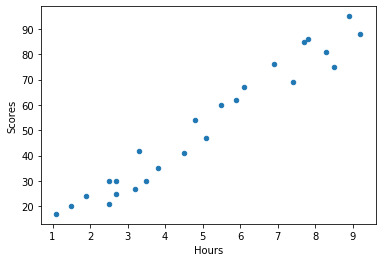

In [101]:
df.plot.scatter('Hours','Scores')

In [102]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

## 4. Splitting Data

In [103]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((17, 1), (8, 1), (17,), (8,))

## 5. Applying Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [105]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 6. Plotting Prediction

In [106]:
Pred = lreg.predict(test_x)
Pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

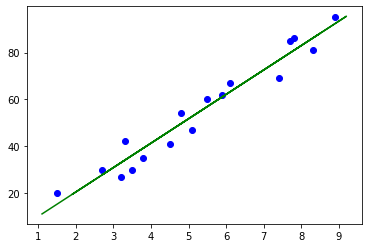

In [107]:
plt.scatter(train_x,train_y,color="Blue")
plt.plot(test_x,Pred,color="Green")

In [108]:
dt = pd.DataFrame({"Actual":test_y,"Predicted":Pred})
dt

,Actual,Predicted
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


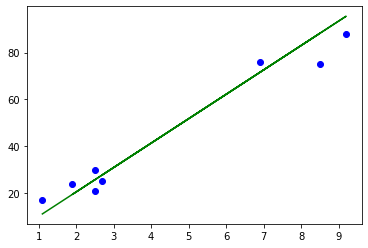

In [109]:
plt.scatter(test_x,test_y,color="Blue")
plt.plot(test_x,Pred,color="Green")

## 7. Solving Problem: Predicting the Score

In [110]:
Pred_Score = lreg.predict([[9.25]])
print("Predicted score for studying 9.25 hrs/day = ",Pred_Score)

Predicted score for studying 9.25 hrs/day =  [96.016123]


## 8. Checking reliability of the model

(i) **RMSLE**

In [111]:
pred_test = lreg.predict(test_x)
test_score_rmsle=np.sqrt(mean_squared_log_error(test_y,pred_test))
print("RMSLE value = ",test_score_rmsle)

RMSLE value =  0.19671223026633838


- **The RMSLE value is close to zero, thus making it a good model**

(ii) **R-Squared**

In [112]:
lreg.score(x,y)

0.948516943450899

- **The R-Squared value is close to 1, thus making it a good model**